<a href="https://colab.research.google.com/github/ThuyLTN/ThucHanhCDTGMT/blob/master/exercise4_20022019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Connect Google drive
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131352 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [0]:
# change directory to mistaken
!mkdir -p drive
!google-drive-ocamlfuse drive

In [24]:
!ls

adc.json  drive        ivan.jpg       man_face1.png
cl_r.jpg  face_detect  man_face1.jpg  sample_data


In [28]:
%cd drive
!ls

[Errno 2] No such file or directory: 'drive'
/content/drive
 Classroom  'Getting started'   ThucHanhCDTGMT	 Untitled0.ipynb


In [0]:
!wget https://upload.wikimedia.org/wikipedia/commons/9/98/Tom_Hanks_face.jpg
!mv Tom_Hanks_face.jpg ivan.jpg

--2019-02-20 13:10:33--  https://upload.wikimedia.org/wikipedia/commons/9/98/Tom_Hanks_face.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124494 (122K) [image/jpeg]
Saving to: ‘Tom_Hanks_face.jpg’

Tom_Hanks_face.jpg  100%[===================>] 121.58K  --.-KB/s    in 0.04s   

2019-02-20 13:10:33 (3.38 MB/s) - ‘Tom_Hanks_face.jpg’ saved [124494/124494]



In [31]:
%cd ThucHanhCDTGMT

[Errno 2] No such file or directory: 'ThucHanhCDTGMT'
/content/drive/ThucHanhCDTGMT


In [33]:
!ls

ex2_23012019.ipynb	   FaceDB   test.ipynb
exercise_1_16012019.ipynb  face_dt  Untitled0.ipynb


In [34]:
!pip install mtcnn

In [0]:
from mtcnn.mtcnn import MTCNN
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import glob
import os
%matplotlib inline

In [0]:
list_img_filename = glob.glob(os.path.join(os.getcwd(), "Faces/*.jpg"))

In [0]:
images = [cv2.imread(file) for file in list_img_filename]

In [0]:
def get_box(box):
  x = box[0]
  y = box[1]
  width = box[2]
  height = box[3]
  return x,y,width,height

In [109]:
%cd Face_dt

/content/drive/ThucHanhCDTGMT/Face_dt


In [0]:
detector = MTCNN()
detect_bounds = []
face_detects = []
for index1,image in enumerate(images):
  detect_bound = detector.detect_faces(image)
  detect_bounds.append(detect_bound)
  
  img_filename = list_img_filename[index1].split('/')[-1].split('.')[0]
  
  for index2, face in enumerate(detect_bound):
    x,y,w,h = get_box(face['box'])
    face_dt = image[y:y+h, x:x+w, :]
    face_detects.append(face_dt)
    
    folder_name = img_filename + '_face_' +str(index2)
    os.system('mkdir %s'%folder_name)
    
    cv2.imwrite(folder_name + '/'+folder_name+".png", face_dt)
  

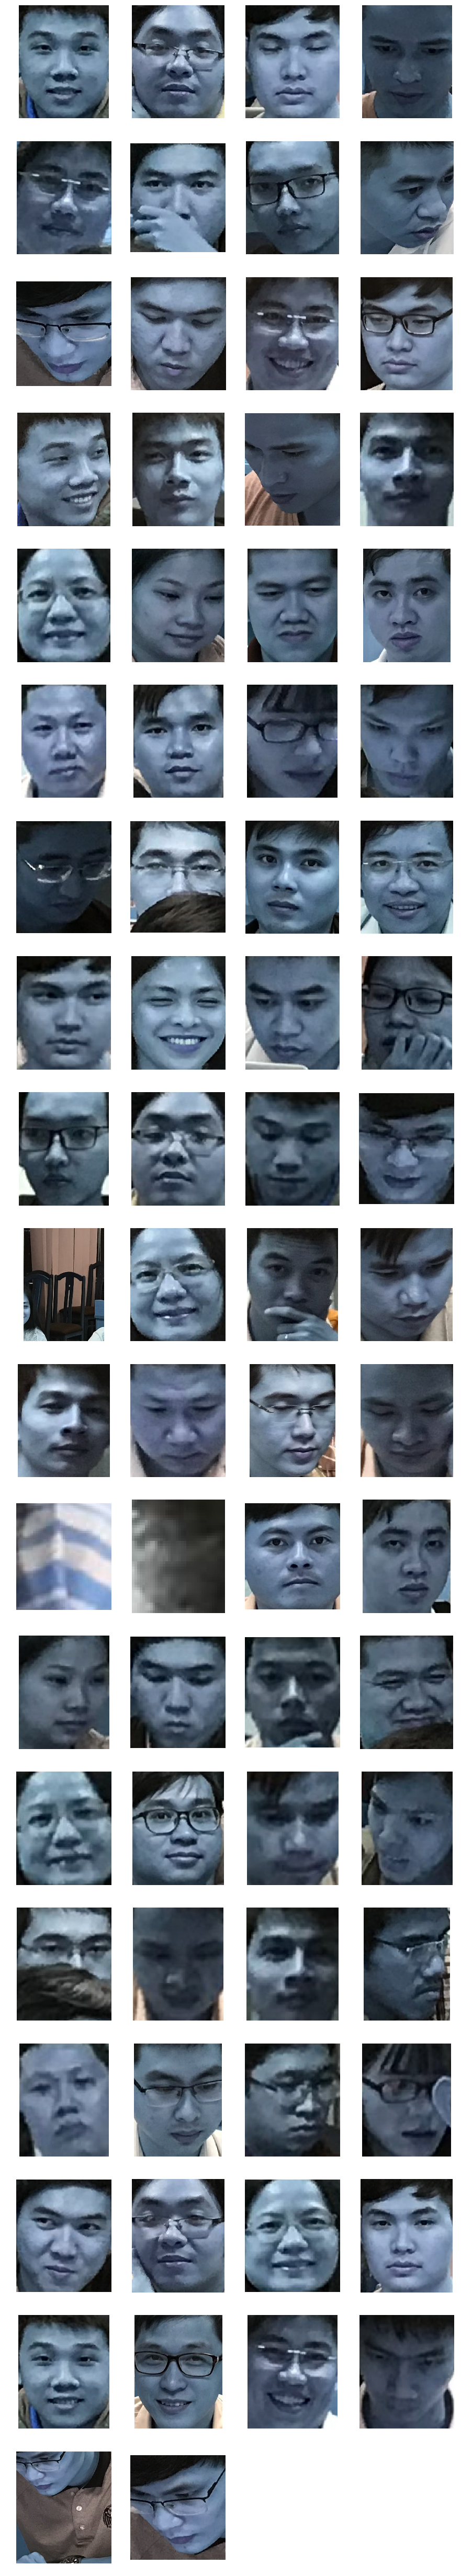

In [118]:
fig = plt.figure(figsize=(15,90))
columns = 4
rows = len(face_detects)//4 + 1
for id,img in enumerate(face_detects):
  fig.add_subplot(rows, columns, id+1)
  plt.imshow(img)
  plt.axis('off')
plt.show()